<a href="https://colab.research.google.com/github/Chaitanya-Gumudala-1710/deep_learning/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deep-learning/Datasets/customer_churn.csv")

In [3]:
data.shape

(7043, 21)

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.drop("customerID", axis='columns', inplace=True)

In [6]:
data = data[data.TotalCharges != ' ']

In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
tenure_churn_no = data[data.Churn == "No"].tenure
tenure_churn_yes = data[data.Churn == "Yes"].tenure

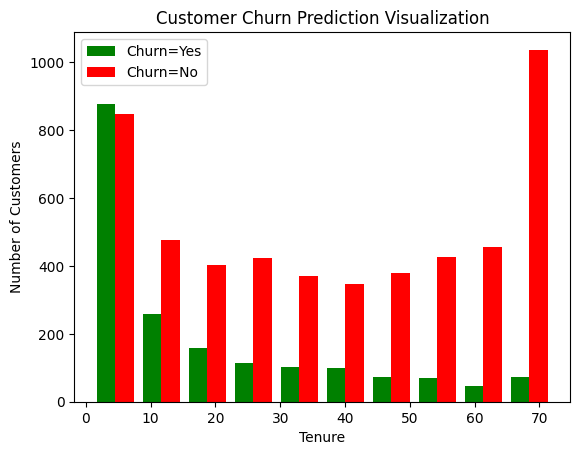

In [10]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=["Churn=Yes", "Churn=No"])
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()
plt.show()

In [11]:
monthly_charge_churn_no = data[data.Churn == "No"].MonthlyCharges
monthly_charge_churn_yes = data[data.Churn == "Yes"].MonthlyCharges

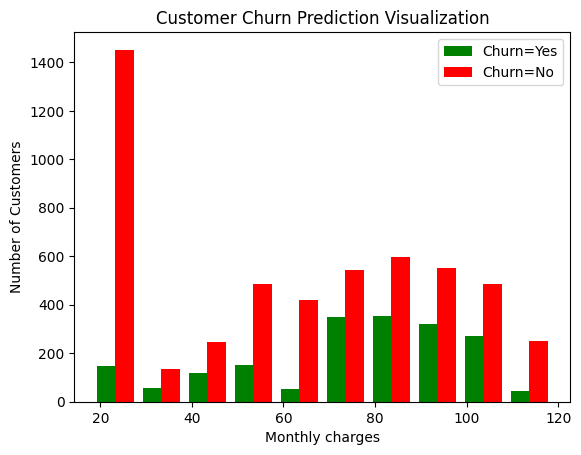

In [12]:
plt.hist([monthly_charge_churn_yes, monthly_charge_churn_no], color=['green', 'red'], label=["Churn=Yes", "Churn=No"])
plt.xlabel("Monthly charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()
plt.show()

In [13]:
def get_unique_column_values(data):
  for column in data:
    if data[column].dtypes == "object":
      print(column, ":", data[column].unique())

In [14]:
get_unique_column_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

In [16]:
get_unique_column_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
get_unique_column_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling" ,"Churn"]
for column in yes_no_columns:
  data[column].replace({'Yes': 1, 'No': 0}, inplace=True)

In [19]:
for column in data:
  print(column, ":", data[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
data['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [21]:
for column in data:
  print(column, ":", data[column].unique())

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
data = pd.get_dummies(data=data, columns=["InternetService", "Contract", "PaymentMethod"])

In [23]:
columns_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [26]:
for column in data:
  print(column, ":", data[column].unique())

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [27]:
X = data.drop("Churn", axis='columns')
y = data["Churn"]

In [28]:
X.shape

(7032, 26)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26, ), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 7s 7ms/step - loss: 0.5114 - accuracy: 0.7458
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4241 - accuracy: 0.7952
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4159 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4125 - accuracy: 0.8036
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4110 - accuracy: 0.8080
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4106 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4063 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4057 - accuracy: 0.8114
Epoch 9/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4029 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4027 - accura

In [37]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.7690


[0.47297731041908264, 0.7690120935440063]

In [38]:
y_predict = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [39]:
y_predictions = []
for element in y_predict:
  if element > 0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [42]:
import seaborn as sns

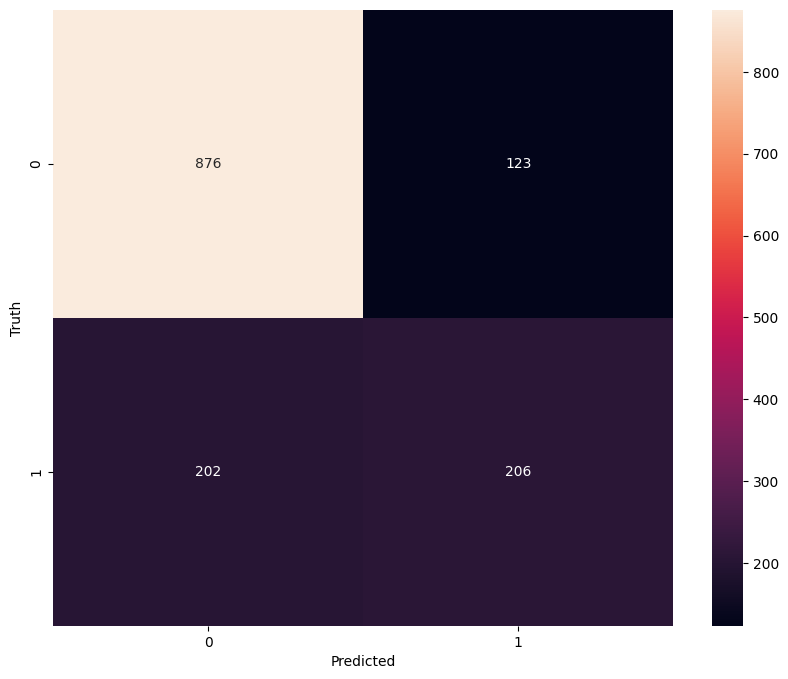

In [43]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [44]:
accuracy = round((877 + 217) / (877 + 217 + 191 + 122), 2)
print("Accuracy of model :", accuracy)

Accuracy of model : 0.78


In [45]:
precision_zero = round(877 / (877 + 191), 2)
print("Precision for 0 class :", precision_zero)

Precision for 0 class : 0.82


In [46]:
precision_one = round(217 / (217 + 122), 2)
print("Precision for 1 class :", precision_one)

Precision for 1 class : 0.64


In [47]:
recall_zero = round(877 / (877 + 122), 2)
print("Recall for 0 class :", recall_zero)

Recall for 0 class : 0.88


In [48]:
recall_one = round(217 / (217 + 191), 2)
print("Recall for 1 class :", recall_one)

Recall for 1 class : 0.53
